In [2]:
# импортируем нужные библиотеки
# операции с массивами
import numpy as np
# рандомайзеры
from numpy import random
import random
# операцци с таблицами
import pandas as pd
# для графиков
import matplotlib.pyplot as plt
import seaborn as sns
# для наборов в наборе
from ast import literal_eval
# для преобраний типов данных
import ast
# для подсчёта корреляций
import scipy.stats


In [3]:
# открываем файл с параметрами аппроксимаций и читаем его
data = pd.read_csv('/Users/tatianalevuna/Desktop/work/moldovan/for_plots_100iter_fin.csv',
                   error_bad_lines=False)
data


/Users/tatianalevuna/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Number of random stains,Iteration number,X coord,Y coord,Exp params,Power params,"AIC, BIC, sse, rmsd power func","AIC, BIC, sse,rmsd exp func"
0,10,0,[ 2 3 4 5 6 7 8 9 10],[ 0.06842654 0.024314 0.0097256 0.008683...,[ 40.53313301 -406.20253165 -1.10243011 -...,[[ 1.23153761e+06 -6.73950789e+03 -3.115006...,"[-54.785951303174137, -53.997052993829257, 0.0...","[-71.958850877411464, -70.775503413394148, 8.8..."
1,10,1,[ 2 3 4 5 6 7 8 9 10],[ 0.17247448 0.0404787 0.0468145 0.026047...,[ 39.40997679 -394.37107395 0.40109171 -...,[[ 1.71158715e+02 -2.02663011e+01 3.274469...,"[-37.861947753772547, -37.073049444427667, 0.0...","[-41.465234088341532, -40.281886624324216, 0.0..."
2,10,2,[ 2 3 4 5 6 7 8 9 10],[ 0.16797642 0.04715128 0.03601834 0.028159...,[ 3.07903602e-01 -4.98343840e+00 -1.5819346...,[[ 1.17672010e+01 -3.31274102e+00 1.779620...,"[-39.730115646413154, -38.941217337068274, 0.0...","[-53.176788082240137, -51.99344061822282, 0.00..."
3,10,3,[ 2 3 4 5 6 7 8 9 10],[ 0.03472649 0.08420406 0.03073141 0.017824...,[ -0.05187287 -5.23003202 3.14099766 -31.44...,[[ 6.65078466e-03 -5.73768841e-02 1.426498...,"[-42.173698345961753, -41.384800036616873, 0.0...","[-38.505279330206633, -37.321931866189317, 0.0..."
4,10,4,[ 2 3 4 5 6 7 8 9 10],[ 0.11764706 0.08805031 0.04217536 0.034406...,[ 1.88790681 -18.9741652 0.145242 -3.84...,[[ 5.99513319e-01 -6.05884053e-01 7.203000...,"[-43.477332530648837, -42.688434221303957, 0.0...","[-41.185429362557095, -40.002081898539778, 0.0..."
...,...,...,...,...,...,...,...,...
6087,70,87,[ 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...,[ 0.27245146 0.26274272 0.15958738 0.083737...,[ 6.29468917e-02 -7.22165442e+00 -2.4251479...,[[ 3.91844397e-02 -1.52064434e-02 -2.860289...,"[-275.82026775465738, -266.88384173626832, 0.0...","[-310.57139684382759, -297.16675781624406, 0.0..."
6088,70,88,[ 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...,[ 0.33456562 0.25261861 0.11706716 0.134935...,[ -2.86361701e-01 -5.84992772e-01 4.6540323...,[[ 4.90304391e-02 -1.55545532e-02 -4.339981...,"[-290.54816356393144, -281.61173754554238, 0.0...","[-299.65350249811388, -286.2488634705303, 0.01..."
6089,70,89,[ 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...,[ 0.45904645 0.19437653 0.13202934 0.139975...,[ -4.81852927e-01 7.93078052e-02 2.2976190...,[[ 1.89687730e-01 -3.33390207e-02 -1.049639...,"[-305.79452715376584, -296.85810113537678, 0.0...","[-264.08127933541897, -250.67664030783541, 0.0..."
6090,70,90,[ 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...,[ 0.31018246 0.18599176 0.12948793 0.108887...,[ -2.70678463e-01 -7.64167460e-01 5.0124305...,[[ 2.41671852e-02 -8.92921230e-03 -1.423811...,"[-329.98221910668059, -321.04579308829153, 0.0...","[-305.20726842110361, -291.80262939352008, 0.0..."


In [5]:
# собираем параметры аппроксимации в списочек
# параметры для степенной
pwr_aics = []
for prm_pwr in data["AIC, BIC, sse, rmsd power func"]:
    prm_pwr = ast.literal_eval(prm_pwr)  # преобразовываем сроки в словарь
    pwr_aics.append(prm_pwr[0])
# смотрим
# print(pwr_aics)
# собираем в список количества штаммов (х координаты)
aic_coords = []
for coords in data['Number of random stains']:
    coords = int(coords)
    aic_coords.append(coords)
# print(aic_coords)
# аики для степенной тоже в список
exp_aics = []
for prm_exp in data["AIC, BIC, sse,rmsd exp func"]:
    prm_exp = ast.literal_eval(prm_exp)
    exp_aics.append(prm_exp[0])
# print(exp_aics)
# вычленяем разность аиков для двух аппроксимаций
diff_aics = []
for indp in pwr_aics:
    inde = pwr_aics.index(indp)
    indp = float(indp)
    inde = exp_aics[inde]
    inde = float(inde)
    diff = indp - inde
    diff_aics.append(diff)
# print(diff_aics)


доля точек больше нуля от колва штаммов

In [6]:
plusdiff = []
pers = []
for point in diff_aics:
    if point > 0:
        plusdiff.append(1)
    else:
        plusdiff.append(0)
    pers.append(sum(plusdiff) / (diff_aics.index(point)+1))
# print(plusdiff)
# print(pers)


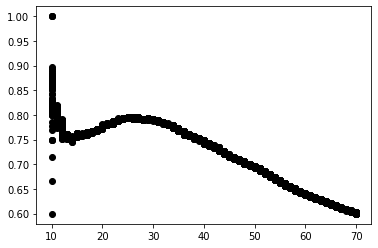

In [7]:
# доля положительных аиков от количества штаммов
plt.scatter(aic_coords, pers, c='k')


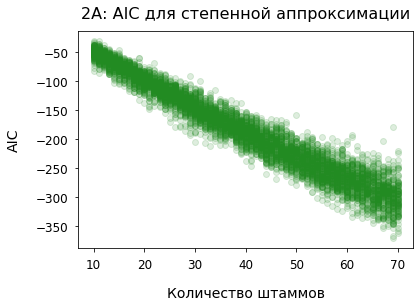

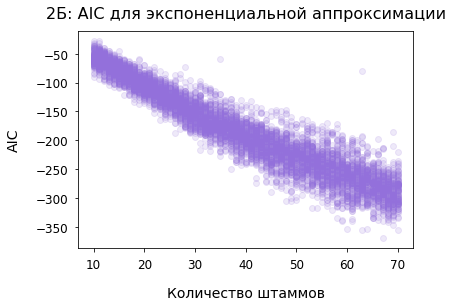

In [13]:
# аики для степенной функции от кол-ва штаммов
plt.scatter(aic_coords, pwr_aics, c='forestgreen', alpha=0.15)
plt.title("2A: AIC для степенной аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("AIC", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6)
plt.show()
# аики для экспоненциальной функции от кол-ва штаммов
plt.scatter(aic_coords, exp_aics, c='mediumpurple', alpha=0.15)
plt.title("2Б: AIC для экспоненциальной аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("AIC", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6)
plt.show()


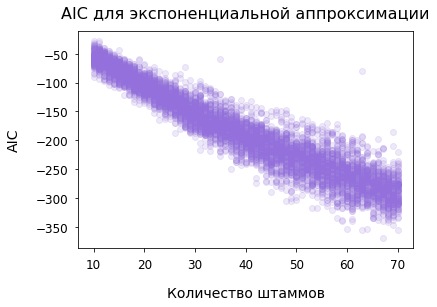

In [8]:
# аики для экспоненциальной функции от количества штаммов
plt.scatter(aic_coords, exp_aics, c='mediumpurple', alpha=0.15)
plt.title("AIC для экспоненциальной аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("AIC", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6)


Cчитаем корреляцию

In [11]:
xx = aic_coords
y_pwr = pwr_aics
y_exp = exp_aics


In [12]:
# Pearson's r
cor_pearson_pwr = scipy.stats.pearsonr(xx, y_pwr)
cor_pearson_exp = scipy.stats.pearsonr(xx, y_exp)
print(cor_pearson_pwr, cor_pearson_exp)


(-0.9708588961852856, 0.0) (-0.9481535427397733, 0.0)


In [13]:
# Spearman's rho
cor_speartman_pwr = scipy.stats.spearmanr(xx, y_pwr)
cor_speartman_exp = scipy.stats.spearmanr(xx, y_exp)
print(cor_speartman_pwr, cor_speartman_exp)


SpearmanrResult(correlation=-0.9724745448071005, pvalue=0.0) SpearmanrResult(correlation=-0.9500255081184314, pvalue=0.0)


In [15]:
# Kendall's tau
cor_kendall_pwr = scipy.stats.kendalltau(xx, y_pwr)
cor_kendall_exp = scipy.stats.kendalltau(xx, y_exp)
print(cor_kendall_pwr, cor_kendall_exp)


KendalltauResult(correlation=-0.8621538955007133, pvalue=0.0) KendalltauResult(correlation=-0.8138512588486848, pvalue=0.0)


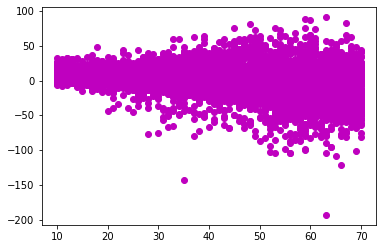

In [9]:
# разность аиков от количества штаммов
plt.scatter(aic_coords, diff_aics, c='m')


1. Мера разброса. Смотрим, насколько наши предсказания стабильны относительно выбора штаммов. Для этого берём 90-процентные интервалы, в которые наши точки попадают.

In [10]:
diff_aics = pd.DataFrame(list(zip(aic_coords, diff_aics)),
                         columns =['Strains', 'AIC difference'])


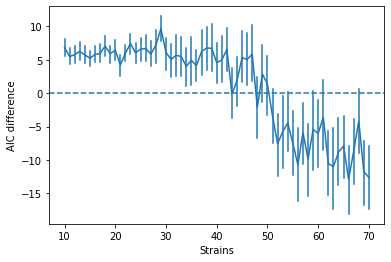

In [11]:
ax = sns.lineplot(x="Strains", y="AIC difference",
                  err_style="bars", ci=90, data=diff_aics)
ax.axhline(0, ls='--')
plt.show()


/Users/tatianalevuna/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/tatianalevuna/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


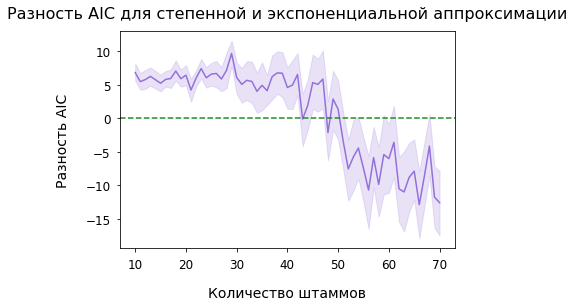

In [12]:
ax2 = sns.lineplot(x="Strains", y="AIC difference", c='mediumpurple',
                   ci=90, data=diff_aics)
ax2.axhline(0, ls='--', c='forestgreen')
plt.title("Разность AIC для степенной и экспоненциальной аппроксимации",
          fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Разность AIC", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6)
plt.show()
